## Import Dependencies

In [1]:
from __future__ import print_function
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
import imageio
import os
import sys
import tarfile
from IPython.display import display, Image
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
import cv2
from random import randint

## Read Original MNIST (+ My Original Extra) Dataset

In [2]:
pickle_file = "D:/Computer Vision/RM/Test5/Dataset_new.pkl" # Replace this! 

with open(pickle_file, 'rb') as f:
    #train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
    all_set, _ = pickle.load(f, encoding="Latin1")
    f.close()

all_x = all_set[0]
all_y = all_set[1]

print("Dataset: ")
print(all_x.shape)
print(all_y.shape)

Dataset: 
(140000, 784)
(140000,)


## Add Background with Random Image Size

New dataset: 
96637
96637


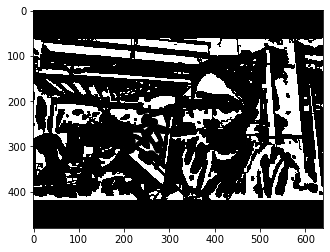

In [3]:
bg = cv2.imread("./bg.png")

plt.imshow(bg, cmap="binary")

new_all_x = list()
new_all_y = list() 

for j in range(0, len(all_x)): 
    i = len(all_x) - 1 - j
    gray = np.array(all_x[i].reshape(28,28,1)*255).astype(np.uint8)
    img = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
    cv2.imshow("img", gray)
    try: 
        gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, (5,5))
        _, contours, _ = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        contour = sorted(contours, key = cv2.contourArea, reverse = True)[0]
        dx,dy,dw,dh = cv2.boundingRect(contour)
        
        w = randint(28, 50) 
        h = randint(max(w-30,0), w+30)
        x = randint(0, bg.shape[0]-w)
        y = randint(0, bg.shape[1]-h)
        roi_x = randint(0, w-28)
        roi_y = randint(0, h-28)
        my_bg = bg[x:x+w, y:y+h].copy()
        my_bg[roi_x:roi_x+28, roi_y:roi_y+28, :] = img[:28, :28]
        new_all_x.append(my_bg)
        new_all_y.append([all_y[i], (roi_y+dx, roi_x+dy), (roi_y+dx+dw, roi_x+dy+dh)])
    except: 
        # cv2.waitKey(0)
        pass
    
    cv2.waitKey(1)
    # np.delete(all_x, all_x[i], axis=0) 
    
cv2.destroyAllWindows()
print("New dataset: ")
print(len(new_all_x))
print(len(new_all_y)) 

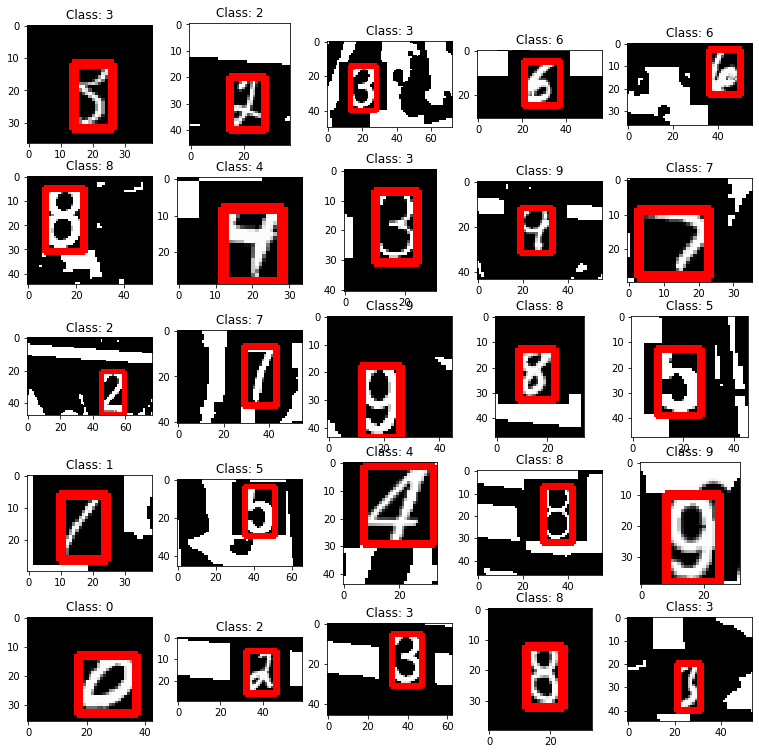

In [5]:
# Sample img. 
fig = plt.figure(figsize=(13, 13))
columns = 5
rows = 5

for i in range(columns*rows):
    idx = randint(0, len(new_all_x))
    img = cv2.rectangle(new_all_x[idx], new_all_y[idx][1], new_all_y[idx][2], (255,0,0), 2)
    ax = fig.add_subplot(rows, columns, i+1)
    ax.set_title("Class: {}".format(new_all_y[idx][0]))  # set title
    plt.imshow(img)

plt.show() 

## Save to Pickle File and Double Check

Saving pickle MNIST_Converted...
Pickle dataset shape: 96637


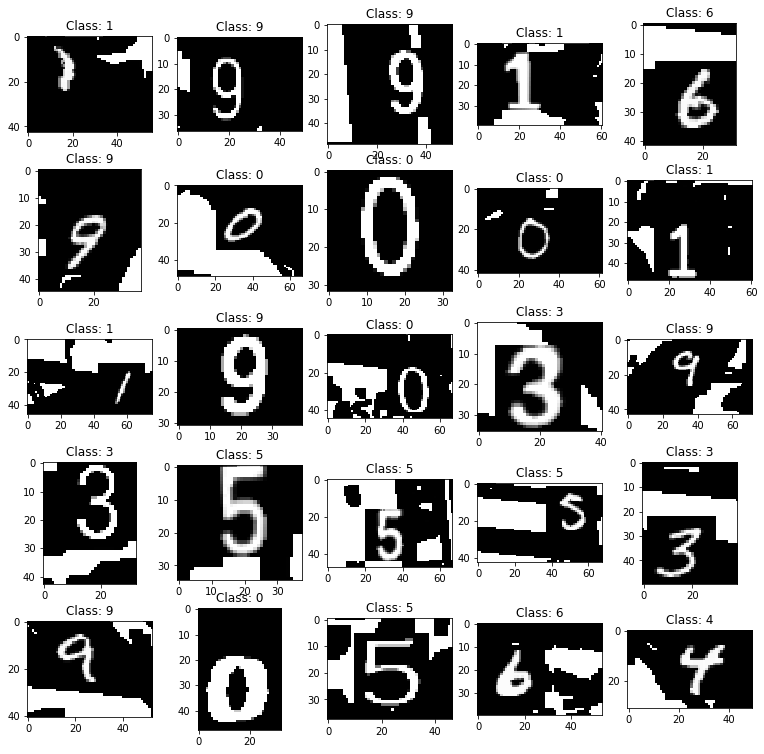

In [11]:
def display_pickle(file): 
    global letter_set
    pickle_file = file + ".pkl"
    fig = plt.figure(figsize=(13, 13))
    columns = 5
    rows = 5
    with open(pickle_file, "rb") as f:
        letter_set = pickle.load(f, encoding="latin1")  # unpickle
        if type(letter_set) == tuple: 
            temp_x = None
            temp_y = None
            for i in np.arange(0, len(letter_set)): 
                if letter_set[i] == "EOF": 
                    break
                x = letter_set[i][0]
                y = letter_set[i][1]
                if temp_x is None: 
                    temp_x = x
                else: 
                    temp_x = np.concatenate((temp_x, x), axis=0)
                if temp_y is None: 
                    temp_y = y
                else: 
                    temp_y = np.concatenate((temp_y, y), axis=0)
            letter_set = temp_x
            labels = temp_y
        print("Pickle dataset shape:", len(letter_set))
        final_img = None
        for i in range(columns*rows): 
            idx = randint(0, len(letter_set))  # pick a random image index
            img = letter_set[idx]
            ax = fig.add_subplot(rows, columns, i+1)
            ax.set_title("Class: {}".format(labels[idx][0]))  # set title
            plt.imshow(img)
        f.close()
        plt.show() 

file_name = "MNIST_Converted"

print("Saving pickle {}...".format(file_name))
try:
    with open(file_name+".pkl", "wb") as f:
        pickle.dump(((new_all_x, new_all_y), "EOF"), f, pickle.HIGHEST_PROTOCOL)
        display_pickle(file_name)
except Exception as e: 
    print("Unable to save data to", file_name, ":", e)

## If you wish to create images with fixed size (For some reason I used this)

New dataset: 
139993
139993


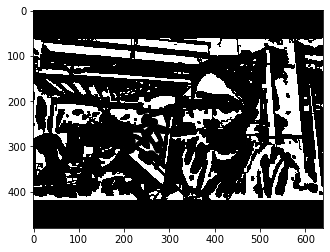

In [12]:
## For 64 x 64. 

bg = cv2.imread("./bg.png")

plt.imshow(bg, cmap="binary")

new_all_x = list()
new_all_y = list() 

for j in range(0, len(all_x)): 
    i = len(all_x) - 1 - j
    gray = np.array(all_x[i].reshape(28,28,1)*255).astype(np.uint8)
    img = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
    cv2.imshow("img", gray)
    try: 
        gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, (5,5))
        _, contours, _ = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        contour = sorted(contours, key = cv2.contourArea, reverse = True)[0]
        dx,dy,dw,dh = cv2.boundingRect(contour)
        
        w = 64
        h = 64
        x = randint(0, bg.shape[0]-w)
        y = randint(0, bg.shape[1]-h)
        roi_x = randint(0, w-28)
        roi_y = randint(0, h-28)
        my_bg = bg[x:x+w, y:y+h].copy()
        my_bg[roi_x:roi_x+28, roi_y:roi_y+28, :] = img[:28, :28]
        new_all_x.append(my_bg)
        new_all_y.append([all_y[i], (roi_y+dx, roi_x+dy), (roi_y+dx+dw, roi_x+dy+dh)])
    except: 
        # cv2.waitKey(0)
        pass
    
    cv2.waitKey(1)
    # np.delete(all_x, all_x[i], axis=0) 
    
cv2.destroyAllWindows()
print("New dataset: ")
print(len(new_all_x))
print(len(new_all_y)) 

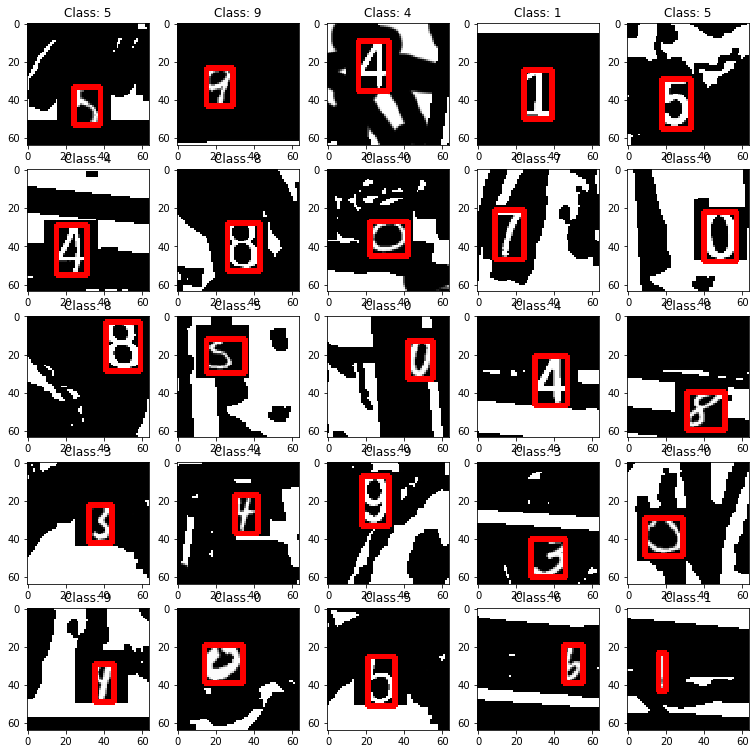

In [16]:
# Sample img. 
fig = plt.figure(figsize=(13, 13))
columns = 5
rows = 5

for i in range(columns*rows):
    idx = randint(0, len(new_all_x))
    img = cv2.rectangle(new_all_x[idx], new_all_y[idx][1], new_all_y[idx][2], (255,0,0), 2)
    ax = fig.add_subplot(rows, columns, i+1)
    ax.set_title("Class: {}".format(new_all_y[idx][0]))  # set title
    plt.imshow(img)

plt.show() 

## If you want to Export TFRECORDS instead of Pickle

Please take note of the output format! This is an example which outputs an array of digits contained in each images, to fulfill the format required by project on https://github.com/jiweibo/SVHN-Multi-Digit-Recognition

In [15]:
import json
from tqdm import tqdm

train_test_ratio = 0.925

class ExampleReader(object):
    def __init__(self, length):
        self._num_examples = length

    @staticmethod
    def _int64_feature(value):
        return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

    @staticmethod
    def _float_feature(value):
        return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

    @staticmethod
    def _bytes_feature(value):
        return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

    def read_and_convert(self, img, y):
        """
        Read and convert to example, returns None if no data is available

        :param digit_struct_mat_file:
        :return:
        """
        label_of_digits = [y[0]]
        length = len(label_of_digits)
        digits = [10, 10, 10, 10, 10]
        for idx, label_of_digit in enumerate(label_of_digits):
            digits[idx] = int(label_of_digit if label_of_digit != 10 else 0)
        image = np.array(img).tobytes()
        example = tf.train.Example(features=tf.train.Features(feature={
            'image': ExampleReader._bytes_feature(image),
            'length': ExampleReader._int64_feature(length),
            'digits': tf.train.Feature(int64_list=tf.train.Int64List(value=digits))
        }))
        
        return example
    
def convert_to_tfrecords(x, y, path_to_tfrecords_file):
    writer = tf.python_io.TFRecordWriter(path_to_tfrecords_file)
    total_files = len(x)
    print("{} images. ".format(total_files))
    example_reader = ExampleReader(total_files)
    for index in tqdm(range(0,len(x))):
        example = example_reader.read_and_convert(x[index], y[index])
        writer.write(example.SerializeToString())
    writer.close()

    return total_files

def create_to_tfrecords_meta_file(num_train_examples, num_val_examples, num_test_examples,
                                  path_to_tfrecords_meta_file):
    print("Saving meta file {}...".format(path_to_tfrecords_meta_file))
    with open(path_to_tfrecords_meta_file, "w") as f:
        content = {
            "num_examples": {
                "train": num_train_examples,
                "val": num_val_examples,
                "test": num_test_examples
            }
        }
        json.dump(content, f)

print("Using train-test ratio : {}. ".format(train_test_ratio))
train_test_ratio -= 0.075 
train_x = new_all_x[:int(train_test_ratio*len(new_all_x))]
train_y = new_all_y[:int(train_test_ratio*len(new_all_x))]
test_x = new_all_x[int(train_test_ratio*len(new_all_x)):int(0.925*len(new_all_x))]
test_y = new_all_y[int(train_test_ratio*len(new_all_x)):int(0.925*len(new_all_x))]
val_x = new_all_x[int(0.925*len(new_all_x)):]
val_y = new_all_y[int(0.925*len(new_all_x)):]

print("Saving {}...".format(file_name+"_train.tfrecords"))
train_len = convert_to_tfrecords(train_x, train_y, file_name+"_train.tfrecords")
print("Saving {}...".format(file_name+"_test.tfrecords"))
test_len = convert_to_tfrecords(test_x, test_y, file_name+"_test.tfrecords")
print("Saving {}...".format(file_name+"_val.tfrecords"))
val_len = convert_to_tfrecords(val_x, val_y, file_name+"_val.tfrecords")

create_to_tfrecords_meta_file(train_len, val_len, test_len, file_name+"_meta.json")

print("Done. ")
print("Train size: {}".format(train_len))
print("Test size: {}".format(test_len))
print("Valuation size: {}".format(val_len))
print("Total size: {}".format(len(new_all_x)))

  0%|▎                                                                          | 436/118994 [00:00<00:27, 4328.43it/s]

Using train-test ratio : 0.925. 
Saving MNIST_Converted_train.tfrecords...
118994 images. 


  4%|██▉                                                                         | 413/10499 [00:00<00:02, 4098.52it/s]

Saving MNIST_Converted_test.tfrecords...
10499 images. 


  4%|███▏                                                                        | 432/10500 [00:00<00:02, 4288.93it/s]

Saving MNIST_Converted_val.tfrecords...
10500 images. 


100%|██████████████████████████████████████████████████████████████████████████| 10500/10500 [00:02<00:00, 4248.82it/s]


Saving meta file MNIST_Converted_meta.json...
Done. 
Train size: 118994
Test size: 10499
Valuation size: 10500
Total size: 139993
